In [5]:
# standard scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)#在控制台输出过程中,默认小数会以科学计数法的形式输出
import warnings
warnings.filterwarnings('ignore') # 忽视

In [24]:
views = pd.DataFrame([1295., 25., 19000., 5., 1., 300.], columns=['views'])
ss = StandardScaler() # 初始化标准差
views['zscore'] = ss.fit_transform(views[['views']])
views

,views,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


In [25]:
vw = np.array(views["views"])
print((vw[2] - np.mean(vw)) / np.std(vw))

2.2313170866252987


In [27]:
# Min-Max Scaler
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['views']])
views

,views,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


## 多项式

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spstats # 统计函数
%matplotlib inline

In [30]:
mpl.style.reload_library()
mpl.style.use('classic') # 经典的
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0) # 画布背景颜色
mpl.rcParams['figure.figsize'] = [6.0, 4.0] # 宽是6.0英寸， 长是4.0英寸
mpl.rcParams['figure.dpi'] = 100 # 图片像素点

In [34]:
poke_df = pd.read_csv('../data/datasets/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [39]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.describe()

,Attack,Defense
count,800.000000,800.000000
mean,79.001250,73.842500
std,32.457366,31.183501
min,5.000000,5.000000
25%,55.000000,50.000000
50%,75.000000,70.000000
75%,100.000000,90.000000
max,190.000000,230.000000


In [40]:
atk_def

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
...,...,...
795,100,150
796,160,110
797,110,60
798,160,60


In [38]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [41]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0
...,...,...,...,...,...
795,100.0,150.0,10000.0,15000.0,22500.0
796,160.0,110.0,25600.0,17600.0,12100.0
797,110.0,60.0,12100.0,6600.0,3600.0
798,160.0,60.0,25600.0,9600.0,3600.0


# 数据分箱 技术 binning 特性

In [43]:
fcc_survey_df = pd.read_csv(
    '../data/datasets/fcc_coder_survey_subset.csv',
    encoding='utf-8'
)
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


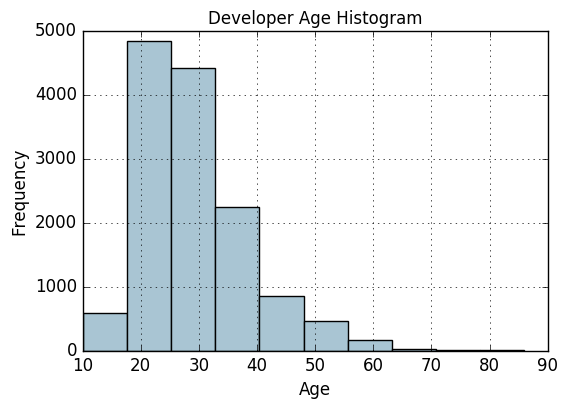

In [46]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')# 蓝色D3的话就是去不去饱和、满意度
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12) #Frequency频率
plt.show()

In [49]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age'] / 10.)))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [50]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


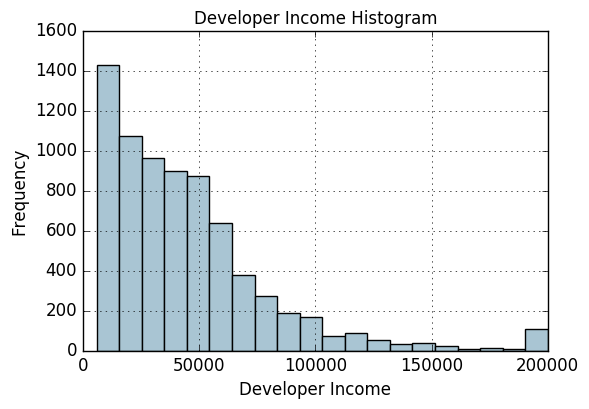

In [51]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=20, color='#A9C5D3')#
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [53]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

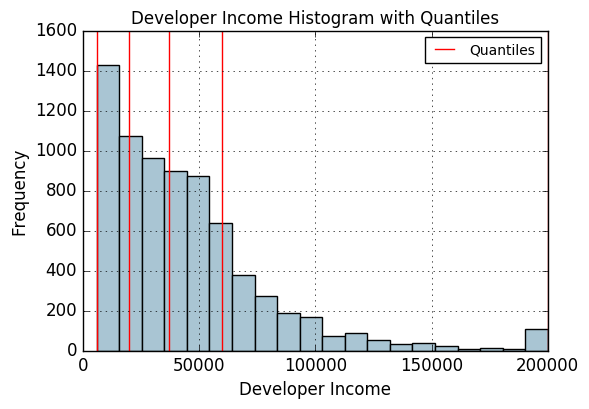

In [57]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=20, color='#A9C5D3')
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r') #axvline:用于画竖线,0分位、1/4分位、1/2分位、3/4分位和1分位
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [60]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantitle_range'] = pd.qcut(
    fcc_survey_df['Income'], q=quantile_list
)
fcc_survey_df['Income_quantile_label'] = pd.qcut(
    fcc_survey_df['Income'],
    q=quantile_list,
    labels=quantile_labels
)
fcc_survey_df[['Income', 'Income_quantitle_range', 'Income_quantile_label']]

,Income,Income_quantitle_range,Income_quantile_label
0,32000.0,"(20000.0, 37000.0]",25-50Q
1,15000.0,"(5999.999, 20000.0]",0-25Q
2,48000.0,"(37000.0, 60000.0]",50-75Q
3,43000.0,"(37000.0, 60000.0]",50-75Q
4,6000.0,"(5999.999, 20000.0]",0-25Q
...,...,...,...
15615,10000.0,"(5999.999, 20000.0]",0-25Q
15616,10000.0,"(5999.999, 20000.0]",0-25Q
15617,48000.0,"(37000.0, 60000.0]",50-75Q
15618,10000.0,"(5999.999, 20000.0]",0-25Q


# 对数变换 COX-BOX


In [62]:
fcc_survey_df['Income_log'] = np.log((1 + fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']]

,ID.x,Age,Income,Income_log
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0,10.373522
1,323e5a113644d18185c743c241407754,22.0,15000.0,9.615872
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0,10.778977
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0,10.668979
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
...,...,...,...,...
15615,734bc2496485b7857ade38d4490cd1ec,39.0,10000.0,9.210440
15616,8d838e8e4604e995d83c95ab764fe78c,27.0,10000.0,9.210440
15617,5b1323796ca6ab9a58936ff772dbb988,37.0,48000.0,10.778977
15618,afe9f743395dedb14b09fe3e1c4db2a6,26.0,10000.0,9.210440


# 特征工程-类别型

In [64]:
#单字节编码,最多能表示的字符范围是0-255,应用于英文系列。比如,字母a的编码为0x61=97
vg_df = pd.read_csv('../data/datasets/vgsales.csv', encoding="ISO-8859-1")
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [68]:
genres = np.unique(vg_df['Genre'])
genres

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [71]:
from sklearn.preprocessing import LabelEncoder
# label 标准化
gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'Action',
 1: 'Adventure',
 2: 'Fighting',
 3: 'Misc',
 4: 'Platform',
 5: 'Puzzle',
 6: 'Racing',
 7: 'Role-Playing',
 8: 'Shooter',
 9: 'Simulation',
 10: 'Sports',
 11: 'Strategy'}

In [75]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


### Map